In [1]:
import cPickle as pickle
import os
import numpy as np
import bob
import bob.io.base

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import lasagne
from lasagne import layers
from lasagne.updates import adam
from lasagne.updates import nesterov_momentum

from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit

from nolearn.lasagne import BatchIterator
# from nolearn.lasagne import visualize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline
%load_ext autoreload
%autoreload 2


Using gpu device 0: Quadro K5000 (CNMeM is enabled with initial size: 80.0% of memory, CuDNN 3007)
/home/raghib/major_pro/cnn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


# A SAMPLE OF DATA AUGMENTATION

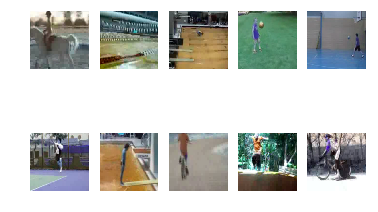

In [12]:
for i in range(10):
    plt.subplot(2,5,i+1)
    a=X_train.reshape((X_train.shape[0],X_train.shape[2],X_train.shape[3],X_train.shape[1]))
#     print X_train.shape
    plt.imshow(a[i])
    plt.subplot(2,5,i+1)
    plt.imshow(a[i])

    plt.axis('off')
plt.show()
del a

# READING TRAINING DATASET

In [3]:
X_train=[]
y_train=[]
pkl=open('/home/sharique/minor/dataset/training.pkl','rb')
total=pickle.load(pkl)
for item in total:
    X_train.append(item[0])
    y_train.append(item[1])

pkl.close()


# THE NETWORK

In [2]:


net = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dense', layers.DenseLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 150, 150),
    conv2d1_num_filters=20,
    conv2d1_filter_size=(5, 5),
    conv2d1_stride=(1, 1),
    conv2d1_pad=(2, 2),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    maxpool1_pool_size=(2, 2),
    conv2d2_num_filters=20,
    conv2d2_filter_size=(5, 5),
    conv2d2_stride=(1, 1),
    conv2d2_pad=(2, 2),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    maxpool2_pool_size=(2, 2),
    dense_num_units=1000,
    dense_nonlinearity=lasagne.nonlinearities.rectify,
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=11,
    update=nesterov_momentum,
    update_momentum=0.9,
    update_learning_rate=0.0001,
    max_epochs=100,
    batch_iterator_train=BatchIterator(batch_size=100),
    train_split=TrainSplit(eval_size=0.0),
    verbose=True
    
)

In [21]:
nn=net.fit(X_train,y_train, v)

/home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/lasagne/layers/conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)


# Neural Network with 27403551 learnable parameters

## Layer information

  #  name      size
---  --------  ----------
  0  input     3x150x150
  1  conv2d1   20x150x150
  2  maxpool1  20x75x75
  3  conv2d2   20x75x75
  4  maxpool2  20x37x37
  5  dense     1000
  6  output    11

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1      68.57963       2.39662     28.61511      0.13920  25.67s
      2       2.39557       2.39551      1.00002      0.13778  23.18s
      3       2.39436       2.39278      1.00066      0.15199  23.17s
      4       2.39280       2.39145      1.00056      0.15270  23.25s
      5       2.38951       2.38784      1.00070      0.15341  23.22s
      6       2.38653       2.38596      1.00024      0.15199  23.20s
      7       2.38359       2.38184      1.00073      0.15199  23.15s
      8       2.38062       2.38111      0.99979      0.15270  23.15s
      9       2.3780

# Network 2


In [4]:
layers0 = [
    # layer dealing with the input data
    (layers.InputLayer, {'shape': (None, 3, 200, 200)}),

    # first stage of our convolutional layers
    (layers.Conv2DLayer, {'num_filters': 96, 'filter_size': (7,7),'stride':(2,2)}),
    (layers.BatchNormLayer,{}),
#     (layers.normalization),
    (layers.MaxPool2DLayer, {'pool_size': (2,2)}),

    # second stage of our convolutional layers
    (layers.Conv2DLayer, {'num_filters': 128, 'filter_size': 5,'stride':2}),
    (layers.BatchNormLayer,{}),
#     (layers.normalization),
    (layers.MaxPool2DLayer, {'pool_size': (2,2)}),

    # third stage of our convolution layers
    (layers.Conv2DLayer, {'num_filters': 512, 'filter_size': 3}),
#     (layers.MaxPool2DLayer, {'pool_size': 2}),
    (layers.Conv2DLayer, {'num_filters': 512, 'filter_size': 3}),

    (layers.Conv2DLayer, {'num_filters': 512, 'filter_size': 3}),
    (layers.MaxPool2DLayer, {'pool_size': 2}),

#     (layers.Conv2DLayer, {'num_filters': 512, 'filter_size': 3}),
#     (layers.MaxPool2DLayer, {'pool_size': 2,'stride':2}),



    # two dense layers with dropout
    (layers.DenseLayer, {'num_units': 2048}),
    (layers.DropoutLayer, {}),
    (layers.DenseLayer, {'num_units': 1024}),

    # the output layer
    (layers.DenseLayer, {'num_units': 11, 'nonlinearity': lasagne.nonlinearities.softmax}),
]
net0 = NeuralNet(
    layers=layers0,
    update_learning_rate=0.0001,
    max_epochs=100,

    update=adam,
   

    objective_l2=0.0025,
    batch_iterator_train=BatchIterator(batch_size=60),
    batch_iterator_test=BatchIterator(batch_size=29),
    train_split=TrainSplit(eval_size=0.02),

    verbose=1,
)

In [40]:
bi = BatchIterator(batch_size=29)

In [ ]:
from nolearn.lasagne import PrintLayerInfo

layer_info=PrintLayerInfo()

In [5]:
type(y_train)
print max(y_train)
y_train=np.asarray(y_train)
X_train=np.asarray(X_train)
y_train=y_train.astype(np.int32)


10


In [6]:
print X_train.shape
print y_train.shape

(258780,)
(258780,)


In [7]:
net0.fit(X_train,y_train)

# Neural Network with 11937739 learnable parameters

## Layer information

  #  name         size
---  -----------  ---------
  0  input0       3x200x200
  1  conv2d1      96x97x97
  2  batchnorm2   96x97x97
  3  maxpool2d3   96x48x48
  4  conv2d4      128x22x22
  5  batchnorm5   128x22x22
  6  maxpool2d6   128x11x11
  7  conv2d7      512x9x9
  8  conv2d8      512x7x7
  9  conv2d9      512x5x5
 10  maxpool2d10  512x2x2
 11  dense11      2048
 12  dropout12    2048
 13  dense13      1024
 14  dense14      11

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  --------
      1       3.51257       4.05365      0.86652      0.39959  5125.20s
      2       0.84329       3.12620      0.26975      0.43407  4777.53s
      3       0.57383       2.86030      0.20062      0.47858  4777.83s
      4       0.45792       2.33676      0.19596      0.53455  4823.67s
      5       0.39173       2.39558      0.16352      0.553

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f3dccc31e50>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f3dccc315d0>,
     check_input=True, custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 3, 200, 200)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'filter_size': (7, 7), 'stride': (2, 2), 'num_filters': 96}), (<class 'lasagne.layers.normalization.BatchNormLayer'>, {}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, ...layers.dense.DenseLayer'>, {'num_units': 11, 'nonlinearity': <function softmax at 0x7f3dccc36aa0>})],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x7f3dc4473de8>, objective_l2=0.0025,
     objective_loss_function=<function categorical_crossentropy at 0x7f3dcc701140>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7f3e2d7238c0>],
     on_training

In [11]:
net0.save_params_to("importantweights.param")

In [10]:
!pwd

/home/raghib/major_pro


In [18]:

pkl=open('vgg16.pkl','rb')
# d = pickle.load(o)
a=pickle.load(pkl)

In [20]:
a.viewkeys()

dict_keys(['mean value', 'synset words', 'model name', 'param values'])

In [43]:
len(a['param values'])
print a['param values'][28]

[[  3.90147837e-03  -1.80806511e-03   1.36159221e-03 ...,   1.05189125e-03
   -5.83238620e-03   1.55499880e-03]
 [  5.35322493e-03  -2.31539086e-03  -3.61574744e-03 ...,  -8.41525383e-04
   -1.55866274e-03   5.22026513e-03]
 [ -3.13405343e-03  -8.60718792e-05   2.81324098e-03 ...,   2.33084010e-03
    4.52873018e-03  -6.23492757e-03]
 ..., 
 [ -4.24027257e-03  -4.14406357e-04  -7.89196289e-04 ...,   6.79930439e-03
    3.37824528e-03   2.13007792e-03]
 [  2.78731284e-04   9.56191774e-03  -6.20277831e-04 ...,  -2.16196757e-03
    5.90845896e-03   1.76626071e-03]
 [  4.96918161e-04   1.63843471e-03  -9.92762507e-04 ...,  -4.49770268e-05
   -3.50919843e-04   5.03490586e-03]]
